Домашняя работа по вычислительной математике, задание 1.

Выполнил: Вязовцев Андрей Викторович, Б01-009

Результат (сначала запустить все ячейки ниже):

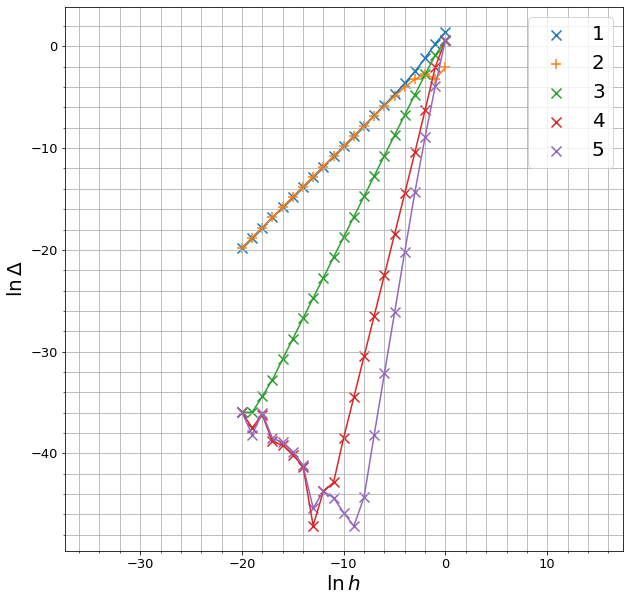

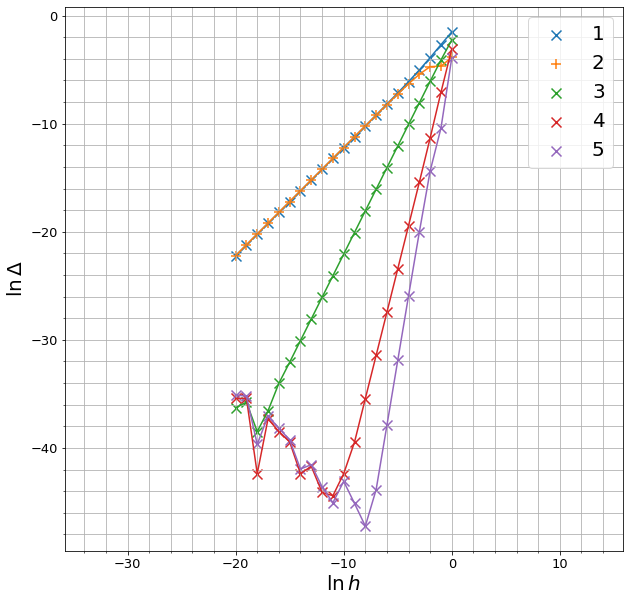

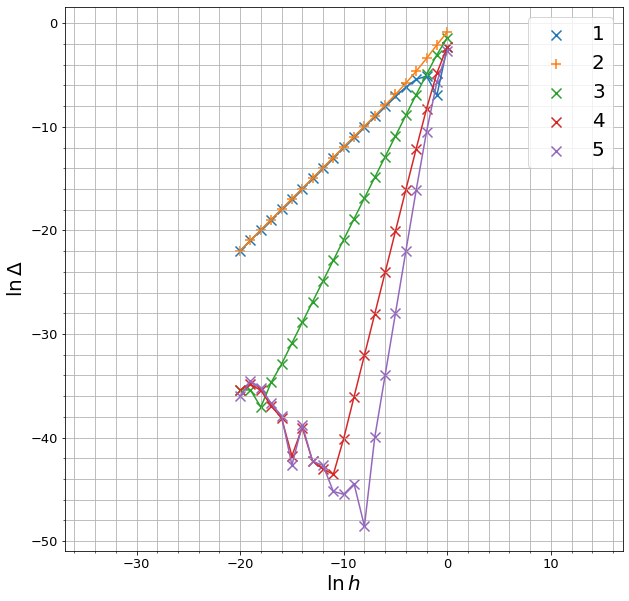

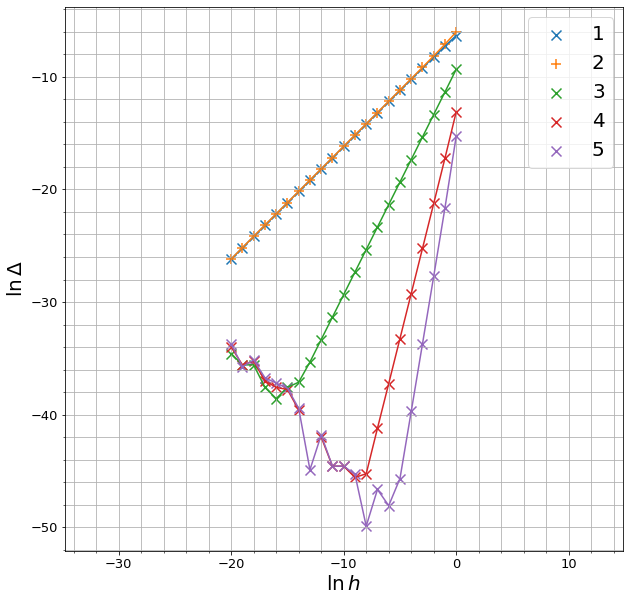

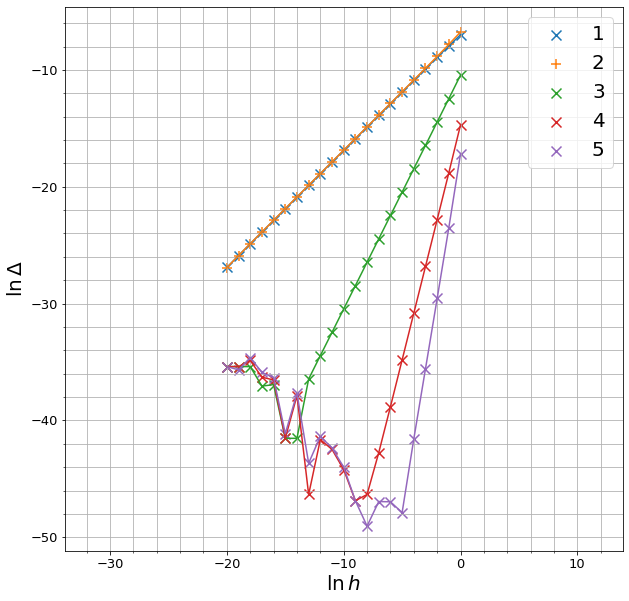

In [79]:
plt.rc ('font', size = 13)
np.seterr(divide = 'ignore') 

for func in func_arr:
    fig = plt.figure(figsize = (10, 10))
    ax  = fig.add_subplot(1,1,1)

    i_diff = 1
    for diff in diffs:
        Delta = np.log2 (np.abs (func.diff (func.point) - diff (func.func, func.point, h_arr)))
        
        if (i_diff == 2):
            mrk = '+'
        else:
            mrk = 'x'
        
        ax.scatter (log2_h_arr, Delta, marker = mrk, s=100, label = str (i_diff))
        ax.plot (log2_h_arr, Delta)
        i_diff += 1

    ax.set_xlabel ('$\ln h$',  fontsize = 20)
    ax.set_ylabel ('$\ln \Delta$', fontsize = 20)

    ax.legend(fontsize = 20)
    ax.minorticks_on()
    ax.grid (which = "major")
    ax.grid (which = "minor")
    ax.axis ('equal')

Необходимые библиотеки:

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Исследуемые функции:

In [11]:
f1 = lambda x: np.sin (x * x)
f2 = lambda x: np.cos (np.sin (x))
f3 = lambda x: np.exp (np.sin (np.cos (x)))
f4 = lambda x: np.log (x + 3)
f5 = lambda x: np.power (x + 3, 0.5)

Их производные:

In [12]:
df1 = lambda x: 2 * x * np.cos (x * x)
df2 = lambda x: -np.sin (np.sin (x)) * np.cos (x)
df3 = lambda x: -np.exp (np.sin (np.cos (x))) * np.cos (np.cos (x)) * np.sin (x)
df4 = lambda x: 1 / (x + 3)
df5 = lambda x: 0.5 * np.power (x + 3, -0.5)

Выберите, в каких точках искать производную каждой функции:

In [50]:
#                 №1  №2  №3  №4  №5
func_poins_arr = [ 1,  1,  1,  3,  3]

In [51]:
class FuncInfo:
    def __init__ (self, func, diff, point):
        self.func = func
        self.diff = diff
        self.point = point
        
func_arr = [FuncInfo (f1, df1, func_poins_arr[0]), 
            FuncInfo (f2, df2, func_poins_arr[1]),
            FuncInfo (f3, df3, func_poins_arr[2]),
            FuncInfo (f4, df4, func_poins_arr[3]),
            FuncInfo (f5, df5, func_poins_arr[4])]

Методы приближённого вычисления производной:

In [14]:
diff1 = lambda f, x, h: (f (x+h) - f (x)) / h
diff2 = lambda f, x, h: (f (x) - f (x-h)) / h
diff3 = lambda f, x, h: (f (x+h) - f (x-h)) / (2*h)
diff4 = lambda f, x, h: 4/3 * diff3 (f, x, h) - 1/3 * diff3 (f, x, 2*h)
diff5 = lambda f, x, h: 3/2 * diff3 (f, x, h) - 3/5 * diff3 (f, x, 2*h) + 1/10 * diff3 (f, x, 3*h)

diffs = [diff1, diff2, diff3, diff4, diff5]

In [19]:
log2_h_arr = np.arange (0, -21, -1)
h_arr = np.power (2.0, log2_h_arr)